# Tasks

Machine Learning and Statistics

Winter 2023/24

by Sarah Hastings
***


## Task 1 

> Square roots are difficult to calculate. In Python, you typically use the power operator (a double asterisk) or a package such as `math`. In this task, you should write a function `sqrt(x)` to approximate the square root of a floating point number x without using the power operator or a package.

> Rather, you should use the Newton’s method. Start with an initial guess for the square root called $z_0$. You then repeatedly improve it using the following formula, until the difference be tween some previous guess $z_i$ and the next $z_{i+1}$ is less than some threshold, say 0.01. 

$$ z_{i+1} = z_i − \frac{z_i × z_i −x}{2z_i} $$

In [2]:
def sqrt(x):
    # Inital guess for the square root.
    z = x / 4.0

    # Loop until we are accurate enough.
    for i in range(100):
        # Newton's method for a better approximation
        z = z - (((z*z)-x)/(2*z))
    # z should now be a good approximation for the square root.
    return z

In [3]:
# Test the function on 3.
sqrt(3)

1.7320508075688774

In [1]:
# Check Python's value for square root of 3.
3**0.5

1.7320508075688772

### Notes 

***

1. The calculation $z^2 - x$ is exactly zero when $z$ is the square root of $x$. It is greater than zero when $z$ is too big. It is less than zero when $z$ is too small. Thus $(z^2-x)^2$ is a good candidate for a cost function.

2. The derivative of the numerator of $z^2 - x$ with respect to $z$ is $2z$. That is the denominator of the fraction in the formula from the question.

In [4]:
# The number that we want to calculate the square root of.
x = 16

In [ ]:
#Our initial guess for the square root -can be anything.
z = 2.0

In [ ]:
# The first approximation
z = z - (((z*z)-x)/(2*z))
z

## Task 2

>  Consider the below contingency table based on a survey asking respondents whether they prefer coffee or tea and whether they prefer plain or chocolate biscuits. Use scipy.stats to perform a chi-squared test to see whether there is any evidence of an association between drink preference and biscuit preference in this
instance. 


![Chi-Square](https://www.quality-assurance-solutions.com/Chi-Square.html)
![Chi](https://www.gstatic.com/education/formulas2/553212783/en/chi_squared_test.svg)

add in latex

In [8]:
# Data frames.
import pandas as pd

import numpy as np
# Shuffles.
import random

# Statistics.
#import scipy.stats as ss
from scipy.stats import chi2_contingency

## Laerd Statistics Chi-Square Test for Independence

https://statistics.laerd.com/spss-tutorials/chi-square-test-for-association-using-spss-statistics.php

***

In [23]:
import numpy as np
from scipy.stats import chi2_contingency

# Create the contingency table
table = np.array([[43, 57], [56, 45]])

# Perform the chi-squared test  

chi2, p, _, expected = chi2_contingency(table)

# Print the contingency table
print("Contingency Table:")
print("     | Chocolate | Plain")
print("-----|-----------|------")
print(f"Coffee| {table[0, 0]:^9} | {table[0, 1]:^4}")
print(f"Tea   | {table[1, 0]:^9} | {table[1, 1]:^4}")
print("\n")

# Print the results
print("Chi-squared value:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

# Check for significance (common significance level is 0.05)
if p < 0.05:
    print("There is evidence of an association between drink preference and biscuit preference.")
else:
    print("There is no significant evidence of an association.")

Contingency Table:
     | Chocolate | Plain
-----|-----------|------
Coffee|    43     |  57 
Tea   |    56     |  45 


Chi-squared value: 2.6359100836554257
P-value: 0.10447218120907394
Degrees of freedom: 1
Expected frequencies:
[[49.25373134 50.74626866]
 [49.74626866 51.25373134]]
There is no significant evidence of an association.


## Task 3

> Perform a t-test on the famous penguins data set to investigate whether there is evidence of a significant difference in the body mass of male and female gentoo penguins.


## Task 4

> Using the famous iris data set,4 suggest whether the setosa class is easily separable from the other two classes. Provide evidence for your answer.


## Task 5

> Perform Principal Component Analysis on the iris data set, reducing the number of dimensions to two. Explain the purpose
of the analysis and your results


## Step by Step PCA with Iris dataset

https://www.kaggle.com/code/shrutimechlearn/step-by-step-pca-with-iris-dataset
    

In [5]:
#Import pandas to allow for data analysis, manipulation
import pandas as pd
#Use Pyplot, part of the Matplotlib library to visualize the diagram/use for visual data/plots etc 
import matplotlib.pyplot as plt
#For working with numerical data, arrays
import numpy as np
#Importing seaborn gives a variety of visualization patterns in addition to matplotlib
import seaborn as sns
#Split the dataset into train and test models
from sklearn.model_selection import train_test_split
#Training model
from sklearn.preprocessing import StandardScaler
#Classification and Logistic regression
from sklearn.linear_model import LogisticRegression
#View accuracy/predictability
from sklearn.metrics import accuracy_score,confusion_matrix
# Principal Component Analysis
from sklearn.decomposition import PCA

In [17]:
iris_data = pd.read_csv('./data/iris.csv', delimiter=',')
iris_data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


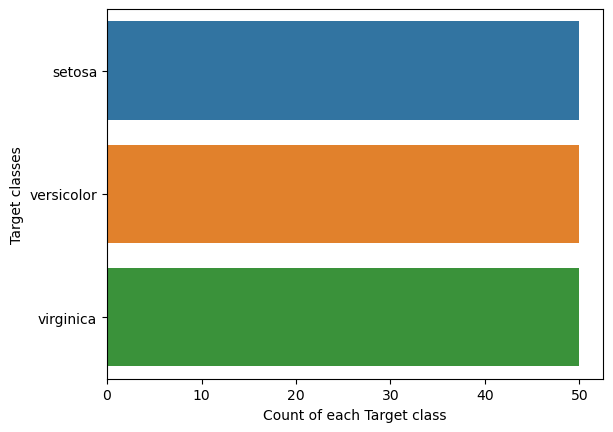

In [19]:
sns.countplot(y=iris_data['class'] ,data=iris_data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

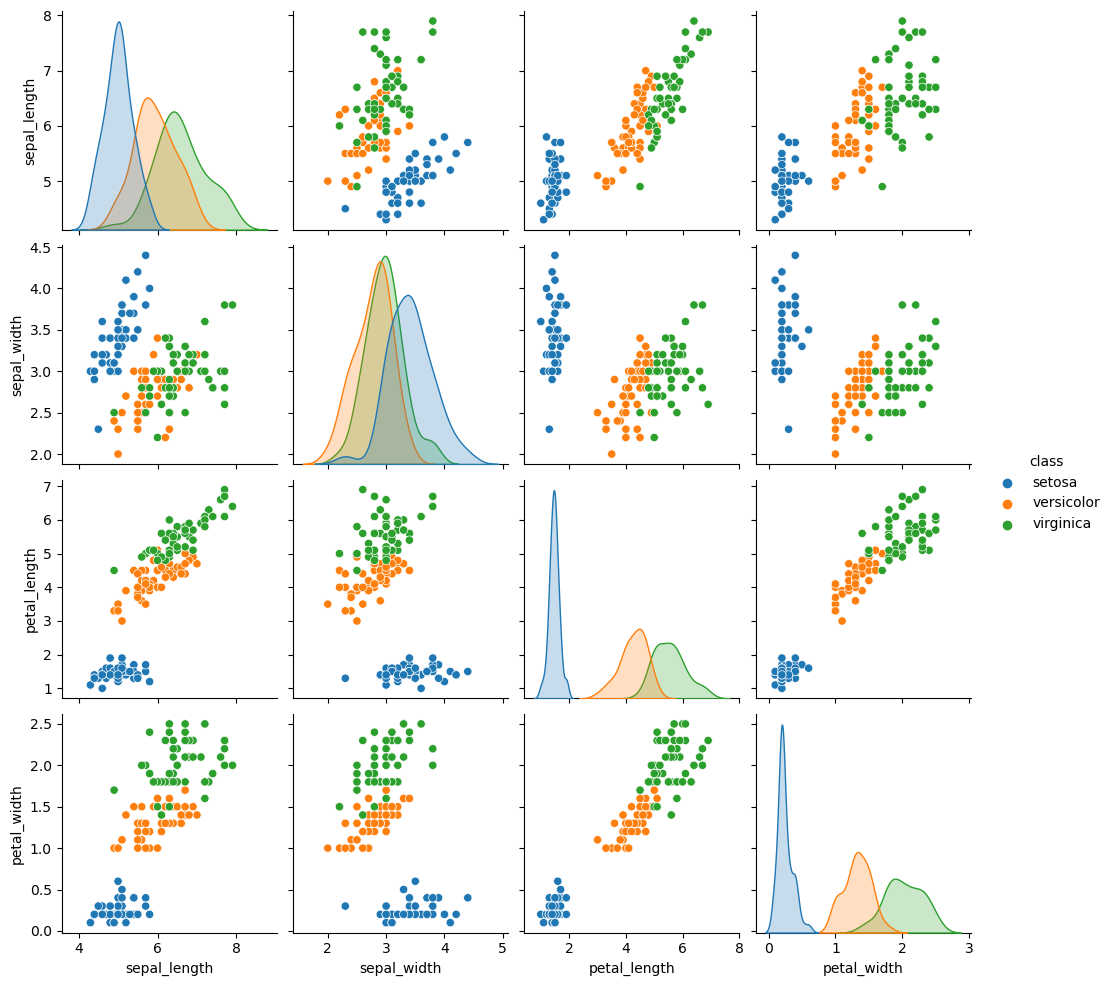

In [24]:
p=sns.pairplot(iris_data, hue = 'class')

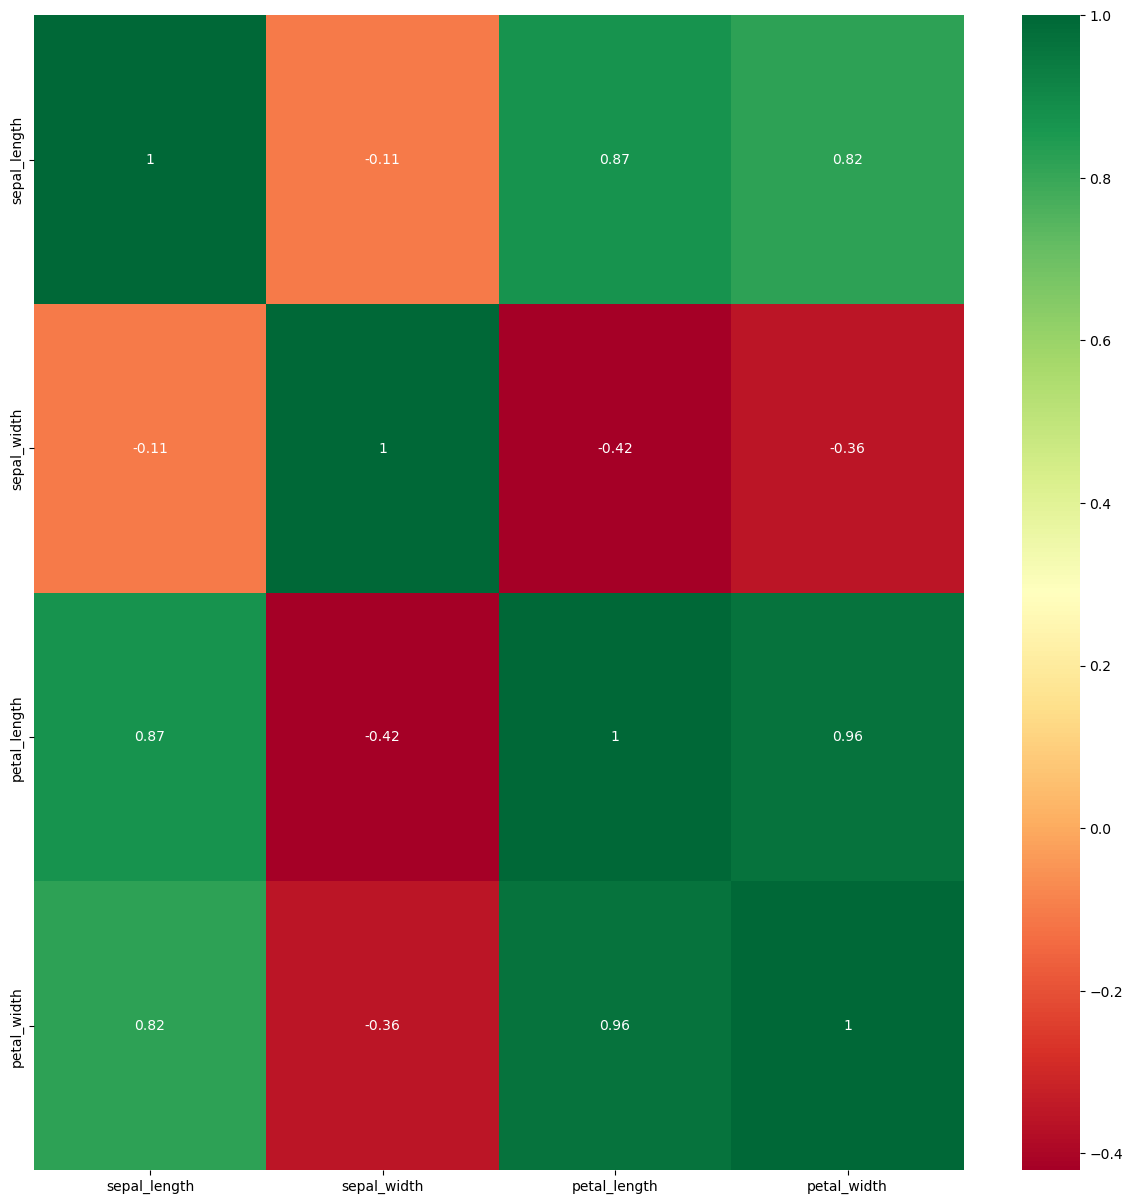

In [25]:
plt.figure(figsize=(15,15))
p=sns.heatmap(iris_data.corr(), annot=True,cmap='RdYlGn') 

One of the biggest aims of these sort of plots and EDAs are to identify features that are not much helpful in explaining the target outcome. The SepalWidthCm feature seems to be less relevant in explaining the target class as compared to the other features

In [27]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

NameError: name 'X' is not defined

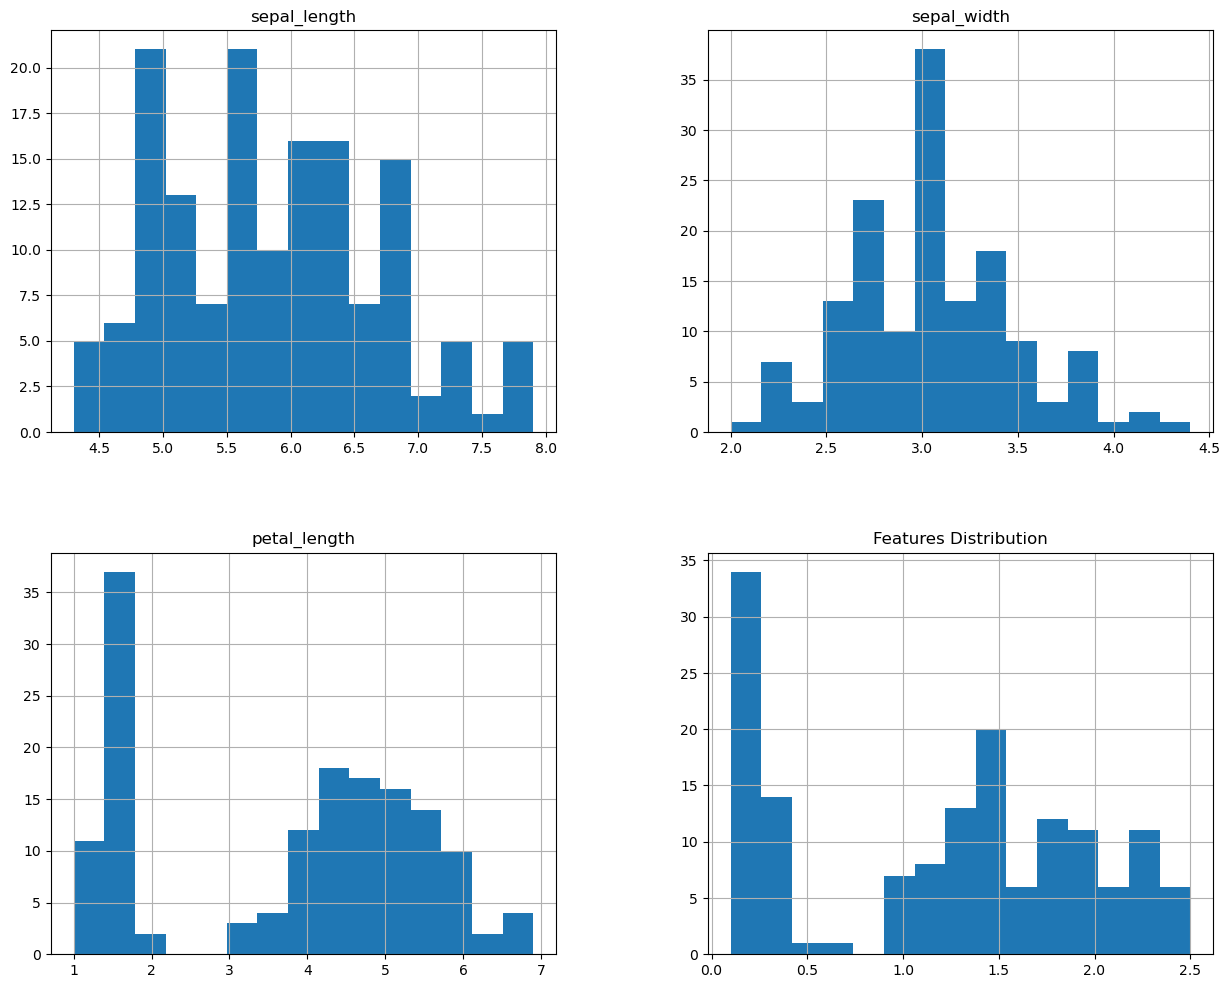

In [26]:
iris_data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

Normalize the data

In [ ]:
Calculate the covariance matrix

In [ ]:
Calculate the eigenvalues and eigenvectors

In [ ]:
Choosing components and forming a feature vector:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA() #select the model
pca.fit(X)  #fit the model
PCs = pca.components_ #get the principal components vectors
exp_var = pca.explained_variance_ #get the explained variance
X_projected = pca.transform(X)  #project the data

Other benefits of PCA include reduction of noise in the data, feature selection (to a certain extent), and the ability to produce independent, uncorrelated features of the data. PCA also allows us to visualize data and allow for the inspection of clustering/classification algorithms.

https://towardsdatascience.com/principal-component-analysis-fbce2a22c6e0
    
https://github.com/TalkingDataScience/Principal_Component_Analysis

https://www.bigabid.com/what-is-pca-and-how-can-i-use-it/

## End